<a href="https://colab.research.google.com/github/AmirGhnbr/Food-Vision/blob/dev_branch/Food_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Lets first download the data
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-09-24 16:10:22--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.128, 142.250.4.128, 74.125.24.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  82.3MB/s    in 6.7s    

2022-09-24 16:10:29 (74.2 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [2]:
import os 

for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.

In [3]:
train_dir = "10_food_classes_all_data/train"
test_dir = "10_food_classes_all_data/test"

In [4]:
# get class names

import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class

  random_img = random.sample(os.listdir(target_folder), 1)

  img = mpimg.imread(target_folder + "/" + random_img[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  # return img

Image shape: (512, 384, 3)


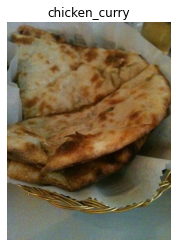

In [6]:
view_random_image(target_dir="10_food_classes_all_data/train/",
                        target_class=random.choice(class_names))

## Process the data

In [7]:
# Load data using keras utilities
import tensorflow as tf

train_ds = tf.keras.utils.image_dataset_from_directory(directory=train_dir,
                                                       seed=42,
                                                       image_size=(224,224),
                                                       batch_size=32)


Found 7500 files belonging to 10 classes.


In [8]:
test_ds = tf.keras.utils.image_dataset_from_directory(test_dir,
                                                       seed=42,
                                                       image_size=(224,224),
                                                       batch_size=32)

Found 2500 files belonging to 10 classes.


## Build basic keras model

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model1 = Sequential([
    tf.keras.layers.Rescaling(1/255., input_shape = (224,224,3)),
    Conv2D(16,3,activation="relu"),
    MaxPool2D(),
    Conv2D(32,3, activation="relu"),
    MaxPool2D(),
    Conv2D(64, 3 , activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(128, activation="relu"),
    Dense(10, activation= "softmax")
])

In [10]:
## Compile the model
model1.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ["accuracy"])

In [11]:
history_1 = model1.fit(train_ds, epochs=10,
                       steps_per_epoch=len(train_ds),
                       validation_data=test_ds,
                       validation_steps=len(test_ds))

Epoch 1/10
235/235 [==============================] - 37s 100ms/step - loss: 2.0527 - accuracy: 0.2632 - val_loss: 1.8401 - val_accuracy: 0.3576
Epoch 2/10
235/235 [==============================] - 19s 80ms/step - loss: 1.7505 - accuracy: 0.3956 - val_loss: 1.8406 - val_accuracy: 0.3656
Epoch 3/10
235/235 [==============================] - 27s 111ms/step - loss: 1.3401 - accuracy: 0.5507 - val_loss: 1.7635 - val_accuracy: 0.4396
Epoch 4/10
235/235 [==============================] - 24s 100ms/step - loss: 0.7825 - accuracy: 0.7435 - val_loss: 2.3123 - val_accuracy: 0.3880
Epoch 5/10
235/235 [==============================] - 23s 98ms/step - loss: 0.3604 - accuracy: 0.8855 - val_loss: 2.7155 - val_accuracy: 0.4128
Epoch 6/10
235/235 [==============================] - 19s 80ms/step - loss: 0.1508 - accuracy: 0.9520 - val_loss: 3.1112 - val_accuracy: 0.3984
Epoch 7/10
235/235 [==============================] - 20s 82ms/step - loss: 0.0960 - accuracy: 0.9720 - val_loss: 3.7870 - val_accura

In [12]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        1

In [13]:
model1.evaluate(test_ds)

79/79 [==============================] - 5s 53ms/step - loss: 4.5935 - accuracy: 0.3708


[4.5934906005859375, 0.3707999885082245]

In [14]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

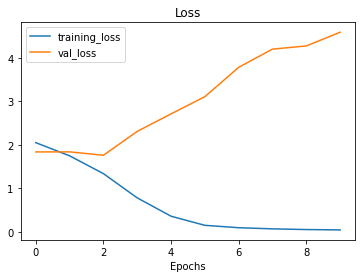

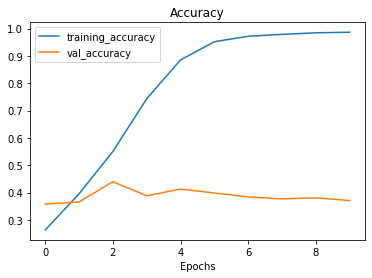

In [15]:
plot_loss_curves(history_1)

#### Validation loss is increasing means that models is overfitting the data

In [16]:
## Using data augmentation
data_augmentation_layer = Sequential([
    tf.keras.layers.RandomFlip("horizontal",input_shape=(224,224,3)),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1)
])

In [17]:
## Build model_2
model_2 = Sequential([
    data_augmentation_layer,
    tf.keras.layers.Rescaling(1./255),
    Conv2D(16, 3, padding="same", activation="relu", kernel_regularizer = tf.keras.regularizers.L2(0.2)),
    MaxPool2D(),
    Conv2D(32, 3, padding="same", activation="relu", kernel_regularizer = tf.keras.regularizers.L2(0.2)),
    MaxPool2D(),
    Conv2D(64, 3, padding="same", activation="relu", kernel_regularizer = tf.keras.regularizers.L2(0.2)),
    MaxPool2D(),
    tf.keras.layers.Dropout(0.2),
    Flatten(),
    Dense(128, activation="relu"),
    Dense(10, activation= "softmax", name="output")
])

In [18]:
# Compile the model
model_2.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                optimizer = tf.keras.optimizers.Adam(0.0004),
                metrics = ["accuracy"])

In [19]:
history_2 = model_2.fit(train_ds, epochs = 15,
                        steps_per_epoch= len(train_ds),
                        validation_data = test_ds,
                        validation_steps = len(test_ds))

Epoch 1/15


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


235/235 [==============================] - 26s 103ms/step - loss: 6.7177 - accuracy: 0.2019 - val_loss: 2.9877 - val_accuracy: 0.2528
Epoch 2/15
235/235 [==============================] - 29s 121ms/step - loss: 2.5210 - accuracy: 0.2612 - val_loss: 2.3015 - val_accuracy: 0.2628
Epoch 3/15
235/235 [==============================] - 24s 101ms/step - loss: 2.2253 - accuracy: 0.2867 - val_loss: 2.1359 - val_accuracy: 0.3016
Epoch 4/15
235/235 [==============================] - 23s 97ms/step - loss: 2.1453 - accuracy: 0.2999 - val_loss: 2.0924 - val_accuracy: 0.3096
Epoch 5/15
235/235 [==============================] - 24s 99ms/step - loss: 2.0946 - accuracy: 0.3064 - val_loss: 2.0733 - val_accuracy: 0.3116
Epoch 6/15
235/235 [==============================] - 20s 83ms/step - loss: 2.0666 - accuracy: 0.3152 - val_loss: 2.0275 - val_accuracy: 0.3276
Epoch 7/15
235/235 [==============================] - 24s 99ms/step - loss: 2.0443 - accuracy: 0.3199 - val_loss: 1.9933 - val_accuracy: 0.3356


In [20]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                  

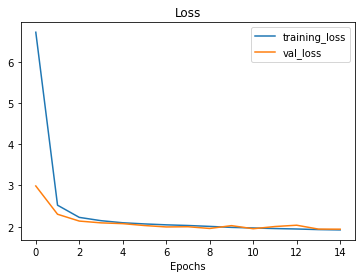

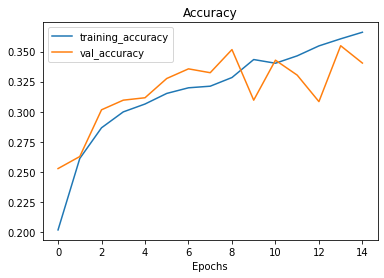

In [21]:
plot_loss_curves(history_2)

In [22]:
model_2.evaluate(test_ds)

79/79 [==============================] - 8s 98ms/step - loss: 1.9391 - accuracy: 0.3404


[1.9391001462936401, 0.34040001034736633]

## Try another cnn architecture

In [23]:
model_3 = Sequential([
    data_augmentation_layer,
    tf.keras.layers.Rescaling(1./255, input_shape=(224,224,3)),
    Conv2D(64 ,3 , activation="relu", padding="same"),
    MaxPool2D(),
    Conv2D(128 ,3 , activation="relu", padding="same"),
    Conv2D(128 ,3 , activation="relu", padding="same"),
    MaxPool2D(),
    Conv2D(256 ,3 , activation="relu"),
    Conv2D(256 ,3 , activation="relu"),
    Flatten(),
    Dense(128 , activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    Dense(64 , activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    Dense(10, activation= "softmax", name="output")
])

In [24]:
model_3.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [25]:
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_8 (Conv2D)           (None, 112, 112, 128)     147584    
                                                      

In [26]:
history_3 = model_3.fit(train_ds, epochs=10,
                        steps_per_epoch= len(train_ds),
                        validation_data= test_ds,
                        validation_steps = len(test_ds))

Epoch 1/10
235/235 [==============================] - 67s 260ms/step - loss: 2.8659 - accuracy: 0.1299 - val_loss: 2.8695 - val_accuracy: 0.1496
Epoch 2/10
235/235 [==============================] - 59s 250ms/step - loss: 2.4571 - accuracy: 0.1541 - val_loss: 2.1996 - val_accuracy: 0.1816
Epoch 3/10
235/235 [==============================] - 58s 246ms/step - loss: 2.3084 - accuracy: 0.1736 - val_loss: 2.2221 - val_accuracy: 0.1856
Epoch 4/10
235/235 [==============================] - 60s 251ms/step - loss: 2.2352 - accuracy: 0.1743 - val_loss: 2.1234 - val_accuracy: 0.2156
Epoch 5/10
235/235 [==============================] - 59s 251ms/step - loss: 2.2060 - accuracy: 0.1807 - val_loss: 2.2091 - val_accuracy: 0.1900
Epoch 6/10
235/235 [==============================] - 59s 247ms/step - loss: 2.1734 - accuracy: 0.1913 - val_loss: 2.1228 - val_accuracy: 0.2080
Epoch 7/10
235/235 [==============================] - 58s 247ms/step - loss: 2.1718 - accuracy: 0.1921 - val_loss: 2.1382 - val_ac

In [27]:
model_3.evaluate(test_ds)

79/79 [==============================] - 7s 80ms/step - loss: 2.3116 - accuracy: 0.1724


[2.3115944862365723, 0.17239999771118164]

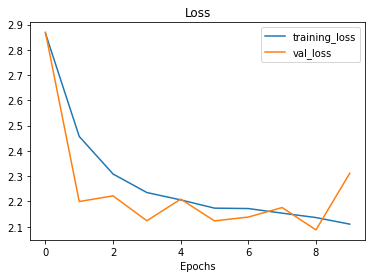

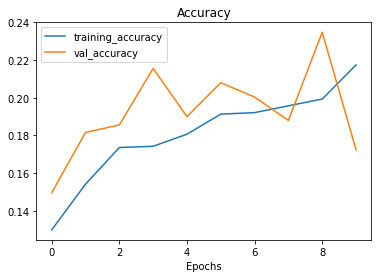

In [28]:
plot_loss_curves(history_3)

## Lets implement our own resnet_34

In [31]:
import tensorflow.keras as keras
from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D, kernel_size=3, strides=1,
                        padding="SAME", use_bias=False)

class ResidualUnit(tf.keras.layers.Layer):
  def __init__(self, filters, strides=1, activation="relu", **kwargs):
    super().__init__(**kwargs)
    self.activation = keras.activations.get(activation)
    self.main_layers = [
        DefaultConv2D(filters, strides= strides),
        keras.layers.BatchNormalization(),
        self.activation,
        DefaultConv2D(filters),
        keras.layers.BatchNormalization()
    ]
    self.skip_layers = []
    if strides>1:
      self.skip_layers = [
          DefaultConv2D(filters, kernel_size=1, strides= strides),
          keras.layers.BatchNormalization()
      ]
    
    def call(self, inputs):
      Z = inputs
      for layer in self.main_layers:
        Z = layer(Z)
      skip_Z = inputs
      for layer in self.skip_layers:
        skip_Z = layer(skip_Z)
      return self.activation(Z + skip_Z)


In [32]:
model_4 = keras.models.Sequential()
model_4.add(DefaultConv2D(64, kernel_size=7, strides=2,
                          input_shape=[224,224,3]))
model_4.add(keras.layers.BatchNormalization())
model_4.add(keras.layers.Activation("relu"))
model_4.add(keras.layers.MaxPool2D(pool_size=3, strides=2, padding="SAME"))
prev_filters=64
for filters in [64] * 3 + [128] * 4 + [256] * 6 + [512] * 3:
  strides = 1 if filters == prev_filters else 2
  model_4.add(ResidualUnit(filters, strides = strides))
  prev_filter = filters
model_4.add(keras.layers.GlobalAvgPool2D())
model_4.add(keras.layers.Flatten())
model_4.add(keras.layers.Dense(10, activation="softmax"))

In [33]:
model_4.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 112, 112, 64)      9408      
                                                                 
 batch_normalization_3 (Batc  (None, 112, 112, 64)     256       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 112, 112, 64)      0         
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 residual_unit_1 (ResidualUn  (None, 56, 56, 64)       0         
 it)                                                             
                                                      

In [38]:
model_4.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = keras.optimizers.Adam(0.1),
                metrics = ["accuracy"])

In [39]:
model_4.fit(train_ds,
            epochs=20,
            steps_per_epoch = len(train_ds),
            validation_data = test_ds,
            validation_steps = len(test_ds))

Epoch 1/20
235/235 [==============================] - 19s 79ms/step - loss: 2.2590 - accuracy: 0.1880 - val_loss: 2.2553 - val_accuracy: 0.1840
Epoch 2/20
235/235 [==============================] - 19s 78ms/step - loss: 2.1922 - accuracy: 0.2056 - val_loss: 2.2295 - val_accuracy: 0.2096
Epoch 3/20
235/235 [==============================] - 19s 79ms/step - loss: 2.1661 - accuracy: 0.2209 - val_loss: 2.6395 - val_accuracy: 0.1772
Epoch 4/20
235/235 [==============================] - 19s 79ms/step - loss: 2.1505 - accuracy: 0.2267 - val_loss: 2.4480 - val_accuracy: 0.1768
Epoch 5/20
235/235 [==============================] - 19s 78ms/step - loss: 2.1532 - accuracy: 0.2380 - val_loss: 2.1607 - val_accuracy: 0.2420
Epoch 6/20
235/235 [==============================] - 19s 79ms/step - loss: 2.1478 - accuracy: 0.2341 - val_loss: 2.1666 - val_accuracy: 0.2204
Epoch 7/20
235/235 [==============================] - 19s 78ms/step - loss: 2.1378 - accuracy: 0.2413 - val_loss: 2.2556 - val_accuracy: